In [1]:
!pip install simpy


In [2]:
import simpy
import random
import math
import pandas as pd

def simulate_crash(speed, distance, reaction_time, brake_eff, friction, mass):
    g = 9.81
    decel = brake_eff * friction * g

    reaction_dist = speed * reaction_time

    braking_dist = (speed**2) / (2 * decel)

    total_stop_dist = reaction_dist + braking_dist

    if total_stop_dist > distance:
        impact_speed = max(0, speed - decel * (distance - reaction_dist) / speed)
        impact_force = mass * impact_speed / 0.1
        return impact_force
    else:
        return 0.0

data = []

N = 1000

for _ in range(N):
    speed = random.uniform(10, 40)
    distance = random.uniform(5, 50)
    reaction_time = random.uniform(0.5, 2.5)
    brake_eff = random.uniform(0.5, 1.0)
    friction = random.uniform(0.3, 0.9)
    mass = random.uniform(800, 2000)

    impact = simulate_crash(speed, distance, reaction_time, brake_eff, friction, mass)

    data.append([speed, distance, reaction_time, brake_eff, friction, mass, impact])

df = pd.DataFrame(data, columns=[
    "speed", "distance", "reaction_time", "brake_eff", "friction", "mass", "impact_force"
])

df.to_csv("crash_simulation_data.csv", index=False)

df.head()


,speed,distance,reaction_time,brake_eff,friction,mass,impact_force
0,21.873018,39.522687,0.947336,0.999529,0.755839,1507.655171,233723.245704
1,34.075775,49.550125,1.537591,0.922065,0.402176,1864.212565,640905.966540
2,15.731084,25.336825,0.974548,0.534609,0.896751,1436.689287,183028.669885
3,19.578154,7.036335,2.238133,0.593335,0.560642,1272.154739,327058.361686
4,25.575463,13.885262,0.682378,0.815172,0.447636,1663.870894,433849.343931


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X = df.drop("impact_force", axis=1)
y = df["impact_force"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(n_estimators=200),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "DecisionTree": DecisionTreeRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)

    results.append([name, r2, rmse, mae])

results_df = pd.DataFrame(results, columns=["Model", "R2", "RMSE", "MAE"])
results_df.sort_values(by="R2", ascending=False)


,Model,R2,RMSE,MAE
3,RandomForest,0.968596,31271.671084,23775.467129
0,LinearRegression,0.920563,49735.989297,36246.157325
2,Lasso,0.920563,49736.053132,36246.518575
1,Ridge,0.920554,49738.842967,36247.529510
6,DecisionTree,0.881858,60654.321624,44693.985565
4,KNN,0.747311,88705.869874,66619.700213
5,SVR,-0.024631,178625.205445,147432.765793


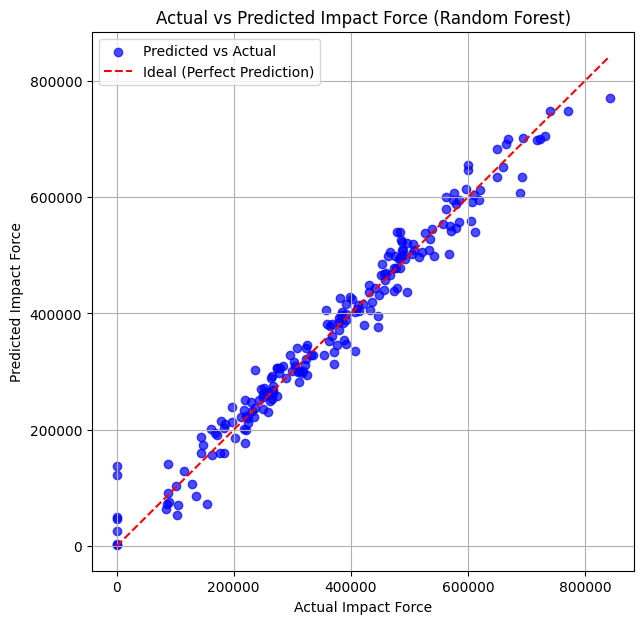

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,7))

plt.scatter(y_test, pred, color="blue", alpha=0.7, label="Predicted vs Actual")

min_val = min(y_test.min(), pred.min())
max_val = max(y_test.max(), pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal (Perfect Prediction)")

plt.xlabel("Actual Impact Force")
plt.ylabel("Predicted Impact Force")
plt.title("Actual vs Predicted Impact Force (Random Forest)")
plt.legend()
plt.grid(True)

plt.savefig("actual_vs_predicted.png", dpi=300, bbox_inches="tight")

plt.show()


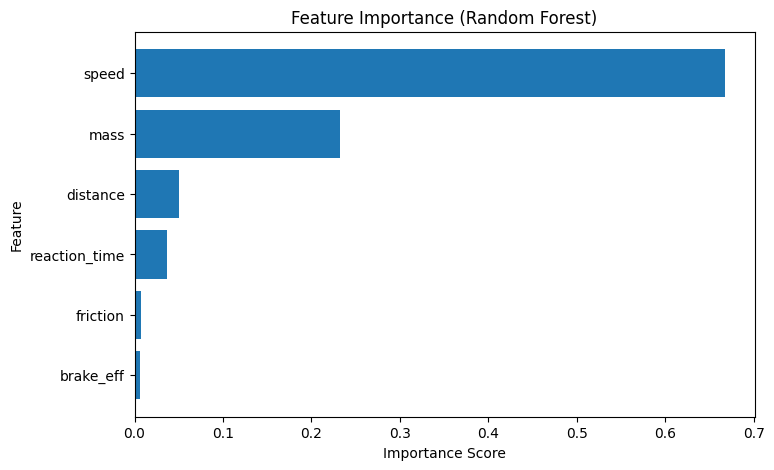

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

importances = best_model.feature_importances_
features = X.columns

fi = pd.DataFrame({"Feature": features, "Importance": importances})
fi = fi.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(fi["Feature"], fi["Importance"])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()

plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")

plt.show()


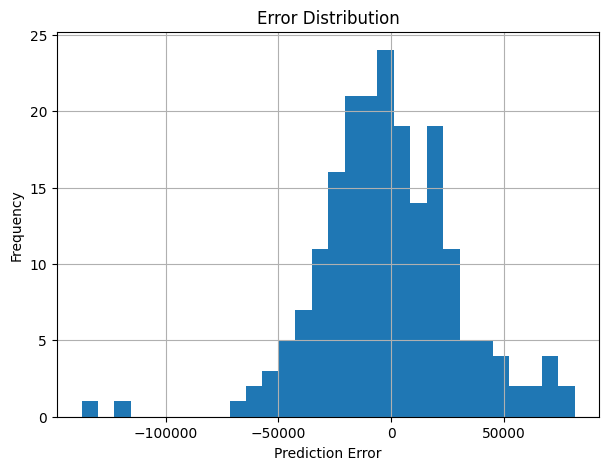

In [11]:
errors = y_test - pred

plt.figure(figsize=(7,5))
plt.hist(errors, bins=30)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("error_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


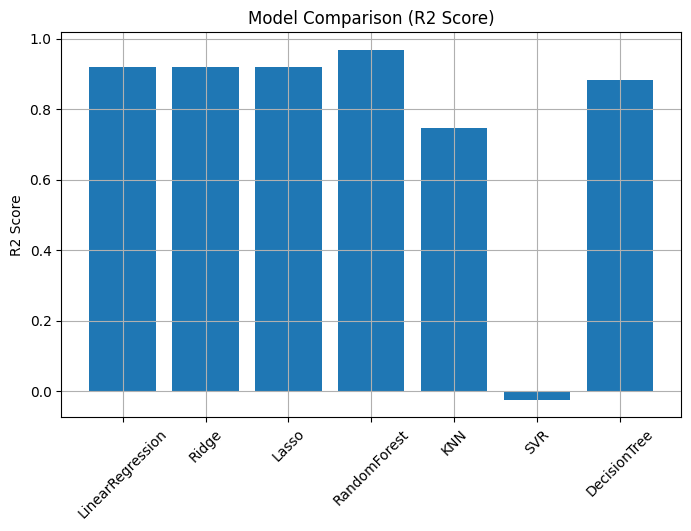

In [12]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["R2"])
plt.xticks(rotation=45)
plt.ylabel("R2 Score")
plt.title("Model Comparison (R2 Score)")
plt.grid(True)
plt.savefig("model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
